In [1]:
from __future__ import annotations
import sys
    # caution: path[0] is reserved for script path (or '' in REPL)
sys.path.insert(1, 'D:/books/python/0.Data Science from Scratch- First Principles with Python/data-science-from-scratch/scratch/')
sys.path

['D:\\books\\python\\0.Data Science from Scratch- First Principles with Python',
 'D:/books/python/0.Data Science from Scratch- First Principles with Python/data-science-from-scratch/scratch/',
 'C:\\Users\\lidan\\miniconda3\\python38.zip',
 'C:\\Users\\lidan\\miniconda3\\DLLs',
 'C:\\Users\\lidan\\miniconda3\\lib',
 'C:\\Users\\lidan\\miniconda3',
 '',
 'C:\\Users\\lidan\\AppData\\Roaming\\Python\\Python38\\site-packages',
 'C:\\Users\\lidan\\miniconda3\\lib\\site-packages',
 'C:\\Users\\lidan\\miniconda3\\lib\\site-packages\\magic_impute-2.0.4-py3.8.egg',
 'C:\\Users\\lidan\\miniconda3\\lib\\site-packages\\seqc-0.2.0-py3.8.egg',
 'C:\\Users\\lidan\\miniconda3\\lib\\site-packages\\weasyprint-56.1-py3.8.egg',
 'C:\\Users\\lidan\\miniconda3\\lib\\site-packages\\cairocffi-1.3.0-py3.8.egg',
 'C:\\Users\\lidan\\miniconda3\\lib\\site-packages\\win32',
 'C:\\Users\\lidan\\miniconda3\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\lidan\\miniconda3\\lib\\site-packages\\Pythonwin']

In [3]:
def predict(alpha: float, beta: float, x_i: float) -> float:
    return beta * x_i + alpha

def error(alpha: float, beta: float, x_i: float, y_i: float) -> float:
    """
    The error from predicting beta * x_i + alpha
    when the actual value is y_i
    """
    return predict(alpha, beta, x_i) - y_i

from linear_algebra import Vector

def sum_of_sqerrors(alpha: float, beta: float, x: Vector, y: Vector) -> float:
    return sum(error(alpha, beta, x_i, y_i) ** 2
               for x_i, y_i in zip(x, y))

from typing import Tuple
from linear_algebra import Vector
from statistics2 import correlation, standard_deviation, mean

def least_squares_fit(x: Vector, y: Vector) -> Tuple[float, float]:
    """
    Given two vectors x and y,
    find the least-squares values of alpha and beta
    """
    beta = correlation(x, y) * standard_deviation(y) / standard_deviation(x)
    alpha = mean(y) - beta * mean(x)
    return alpha, beta

x = [i for i in range(-100, 110, 10)]
y = [3 * i - 5 for i in x]

# Should find that y = 3x - 5
assert least_squares_fit(x, y) == (-5, 3)

In [4]:
least_squares_fit(x, y)

(-5.0, 3.0)

In [5]:
from statistics2 import num_friends_good, daily_minutes_good

alpha, beta = least_squares_fit(num_friends_good, daily_minutes_good)
assert 22.9 < alpha < 23.0
assert 0.9 < beta < 0.905

alpha, beta

(22.94755241346903, 0.903865945605865)

In [9]:
num_friends_good[:5], daily_minutes_good[:5]

([49, 41, 40, 25, 21], [68.77, 51.25, 52.08, 38.36, 44.54])

In [6]:
from statistics2 import de_mean

def total_sum_of_squares(y: Vector) -> float:
    """the total squared variation of y_i's from their mean"""
    return sum(v ** 2 for v in de_mean(y))

def r_squared(alpha: float, beta: float, x: Vector, y: Vector) -> float:
    """
    the fraction of variation in y captured by the model, which equals
    1 - the fraction of variation in y not captured by the model
    """
    return 1.0 - (sum_of_sqerrors(alpha, beta, x, y) /
                  total_sum_of_squares(y))

rsq = r_squared(alpha, beta, num_friends_good, daily_minutes_good)
assert 0.328 < rsq < 0.330

rsq

0.3291078377836305

In [7]:
sum_of_sqerrors(alpha, beta, num_friends_good, daily_minutes_good) /total_sum_of_squares(daily_minutes_good)

0.6708921622163695

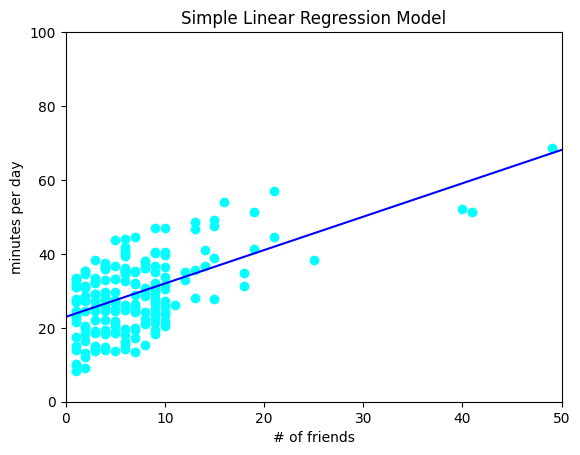

In [20]:
from matplotlib import pyplot as plt
import numpy as np

plt.scatter(num_friends_good, daily_minutes_good, color = 'cyan')
x = np.linspace(0,50,100)
y = alpha + beta * x
plt.plot(x, y, 'b')
plt.xlim(0, 50)
plt.ylim(0, 100)
plt.title('Simple Linear Regression Model')
plt.xlabel('# of friends')
plt.ylabel('minutes per day')
plt.show()

In [21]:
def main():
    import random
    import tqdm
    from gradient_descent import gradient_step
    
    num_epochs = 10000
    random.seed(0)
    
    guess = [random.random(), random.random()]  # choose random value to start
    
    learning_rate = 0.00001
    
    with tqdm.trange(num_epochs) as t:
        for _ in t:
            alpha, beta = guess
    
            # Partial derivative of loss with respect to alpha
            grad_a = sum(2 * error(alpha, beta, x_i, y_i)
                         for x_i, y_i in zip(num_friends_good,
                                             daily_minutes_good))
    
            # Partial derivative of loss with respect to beta
            grad_b = sum(2 * error(alpha, beta, x_i, y_i) * x_i
                         for x_i, y_i in zip(num_friends_good,
                                             daily_minutes_good))
    
            # Compute loss to stick in the tqdm description
            loss = sum_of_sqerrors(alpha, beta,
                                   num_friends_good, daily_minutes_good)
            t.set_description(f"loss: {loss:.3f}")
    
            # Finally, update the guess
            guess = gradient_step(guess, [grad_a, grad_b], -learning_rate)
    
    # We should get pretty much the same results:
    alpha, beta = guess
    assert 22.9 < alpha < 23.0
    assert 0.9 < beta < 0.905
    
if __name__ == "__main__": main()

loss: 13196.619: 100%|██████████████████████████████████████████████████████████| 10000/10000 [00:11<00:00, 904.06it/s]


In [22]:
alpha, beta

(22.94755241346903, 0.903865945605865)